<a href="https://colab.research.google.com/github/23-01-2004/Weather-App-/blob/main/Bank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import plot_tree

# Load the dataset
data = pd.read_csv('bank-full.csv', delimiter=';')

# Display the first few rows of the dataset
print(data.head())


   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  


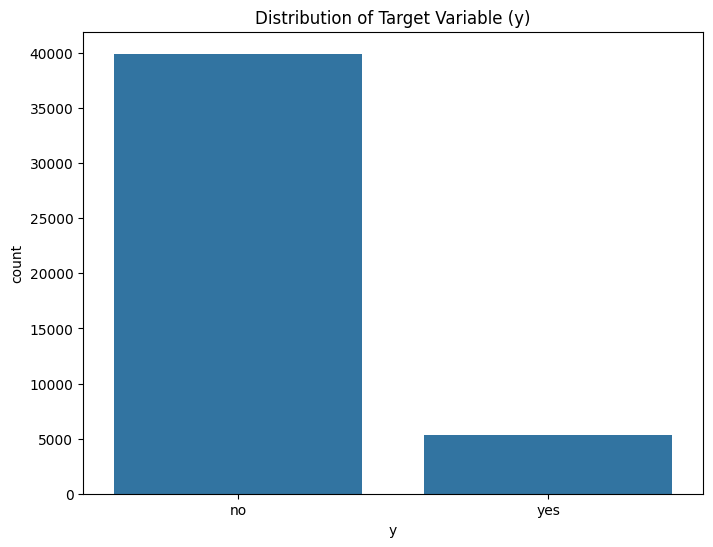

In [4]:
# Visualize the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='y', data=data)
plt.title('Distribution of Target Variable (y)')
plt.show()

In [ ]:
data = pd.get_dummies(data, drop_first=True)


In [6]:
# Ensure all features are numeric for correlation matrix
numeric_data = data.select_dtypes(include=[float, int])

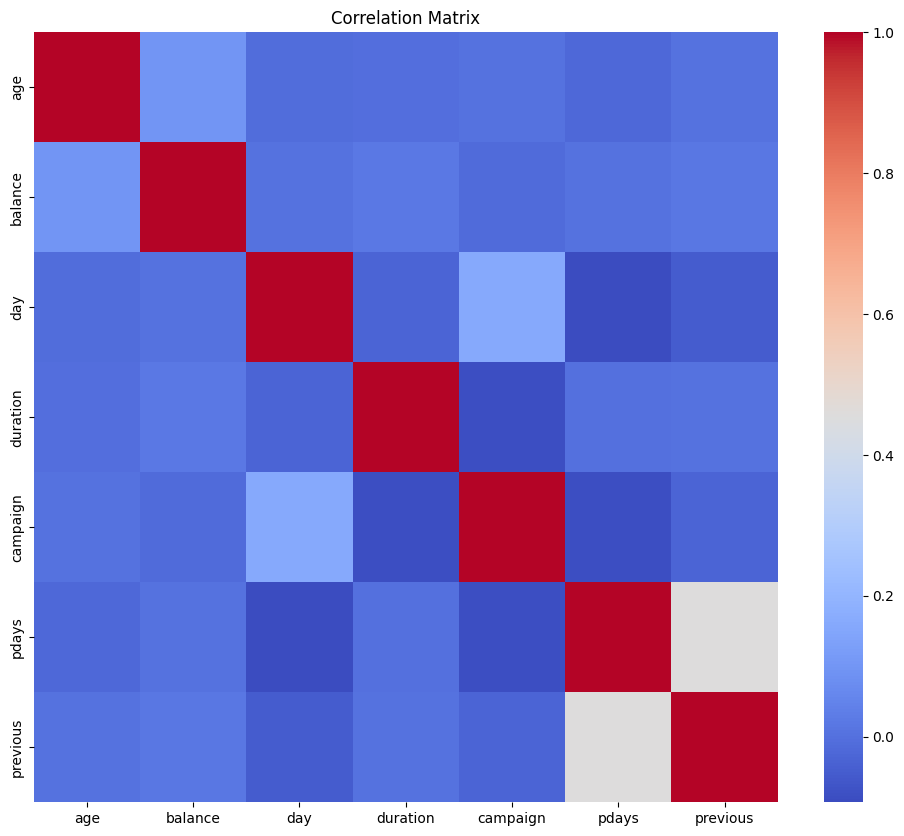

In [8]:
# Visualize the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(numeric_data.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [10]:
data = pd.get_dummies(data, drop_first=True)

In [11]:
print(data.columns)

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'education_secondary',
       'education_tertiary', 'education_unknown', 'default_yes', 'housing_yes',
       'loan_yes', 'contact_telephone', 'contact_unknown', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown', 'y_yes'],
      dtype='object')


In [12]:
target_column = 'y_yes' if 'y_yes' in data.columns else 'y'
X = data.drop(target_column, axis=1)  # Dropping the target column from features
y = data[target_column]  # Target variable

In [13]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [14]:
# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

In [15]:
# Train the classifier
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [16]:
# Make predictions on the test set
y_pred = clf.predict(X_test)

In [17]:
# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

Confusion Matrix:
[[11086   880]
 [  856   742]]

Classification Report:
              precision    recall  f1-score   support

       False       0.93      0.93      0.93     11966
        True       0.46      0.46      0.46      1598

    accuracy                           0.87     13564
   macro avg       0.69      0.70      0.69     13564
weighted avg       0.87      0.87      0.87     13564


Accuracy Score:
0.8720141551164848


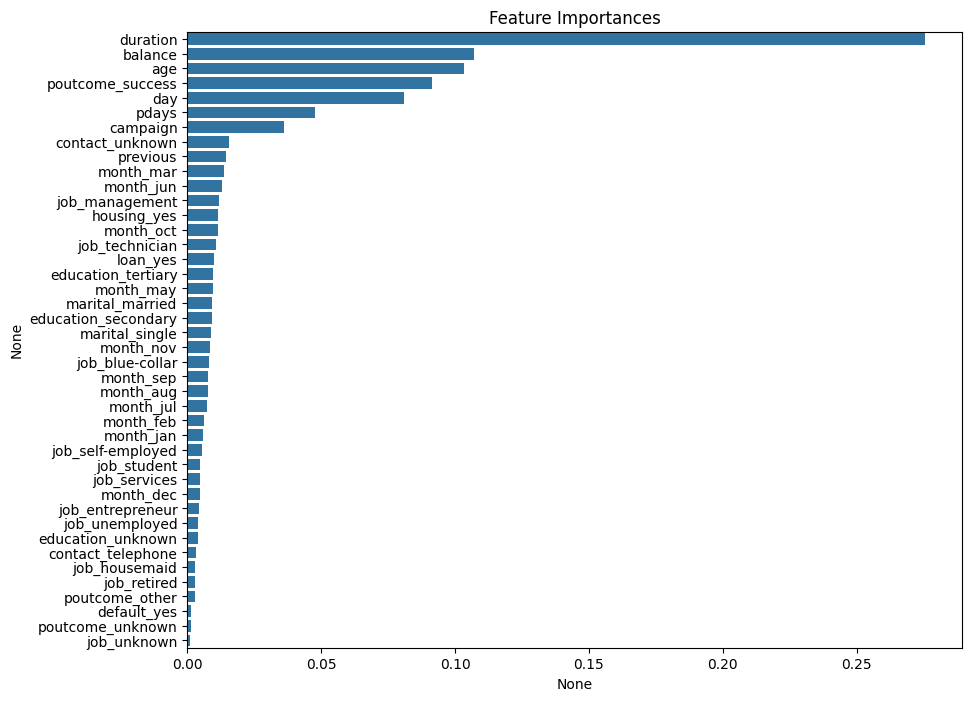

In [18]:
# Visualize feature importances
feature_importances = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title('Feature Importances')
plt.show()

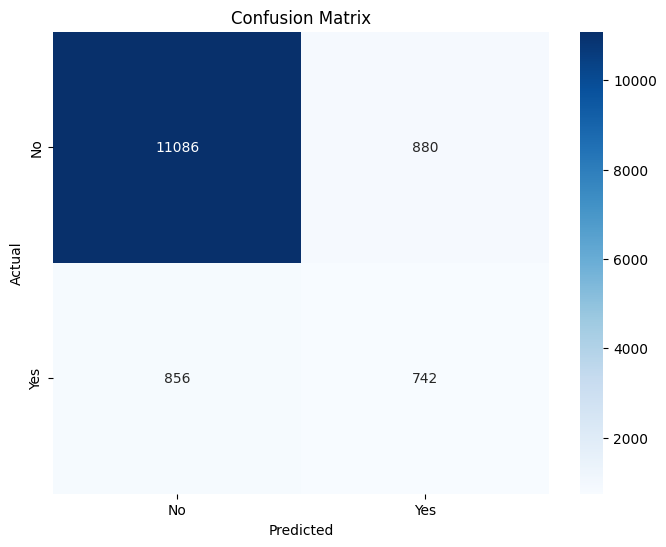

In [19]:
# Plot the confusion matrix using seaborn heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

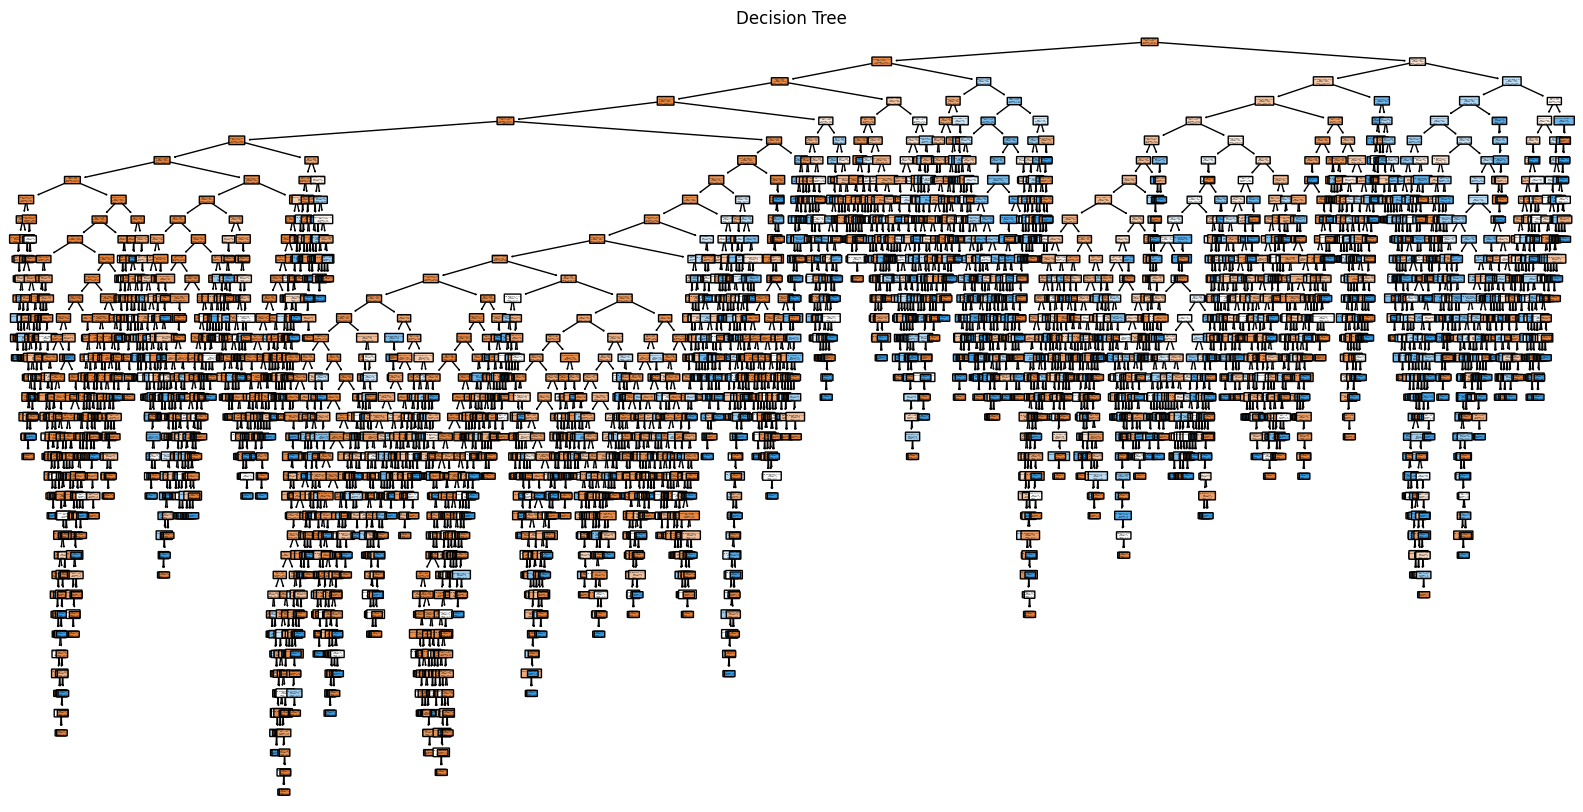

In [20]:
# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=X.columns, class_names=['no', 'yes'], filled=True, rounded=True)
plt.title('Decision Tree')
plt.show()